In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_errors = pd.read_csv('df_test_errors_rf.csv')
df_test = pd.read_csv('df_test_rf.csv')

Let's analyze in which season, round and teams there are more errors

In [3]:
df_errors.shape

(1321, 26)

In [4]:
list_seasons = df_errors['season'].unique()

In [5]:
dict_seasons = {}
for i in list_seasons:
    dict_seasons[i] = df_test[df_test['season'] == i].shape[0]
#dict_seasons

In [6]:
dict_seasons_errors = {}
for i in list_seasons:
    dict_seasons_errors[i] = df_errors[df_errors['season'] == i].shape[0]
#dict_seasons_errors

In [7]:
dict_season_aux = {int(key[:4]): 1- dict_seasons_errors[key] / dict_seasons[key] for key in dict_seasons}
#sort the dict by key from lower to higher
dict_season_aux = dict(sorted(dict_season_aux.items(), key=lambda item: item[0]))

c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

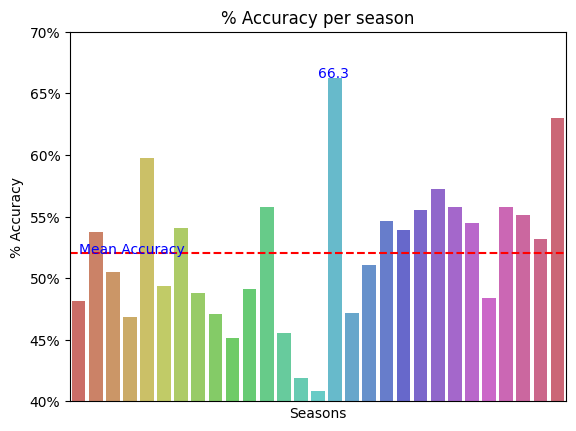

In [62]:
sns.barplot(x=list(dict_season_aux.keys()), y=list(dict_season_aux.values()), palette='hls')
plt.title('% Accuracy per season')
plt.ylabel('% Accuracy')
plt.xlabel('Seasons')
plt.xticks([])
plt.ylim(0.40, 0.7)
#multply y axis by 100
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in vals])

#draw a line which reflects the mean of the accuracy
plt.axhline(y=np.mean(list(dict_season_aux.values())), color='r', linestyle='--')
#write the tick label in the season with max value of accuracy
plt.text(0, np.mean(list(dict_season_aux.values())), 'Mean Accuracy', color='b', fontsize=10)
#add the accuracy value to the bar with season=2004 dict_season_aux[2004]
plt.text(14, dict_season_aux[2004], round(dict_season_aux[2004],3) * 100, color='b', fontsize=10)

plt.show()



c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

Text(-0.5, 0.5202382615057772, 'Mean Accuracy')

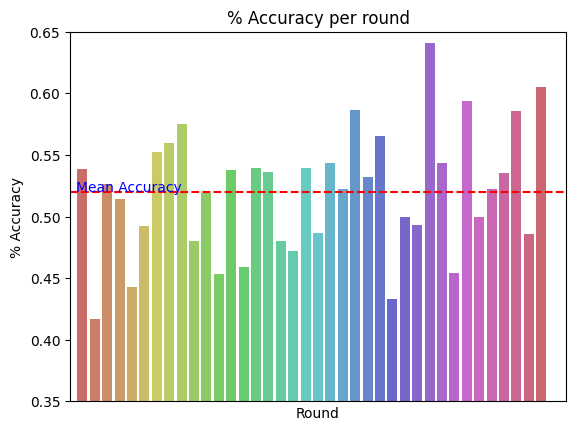

In [56]:
dict_round = {}
for i in range(1, 39):
    dict_round[i] = df_test[df_test['round'] == i].shape[0]
#dict_round

dict_round_errors = {}
for i in range(1, 39):
    dict_round_errors[i] = df_errors[df_errors['round'] == i].shape[0]
#dict_round_errors

dict_round_aux = {key: 1- dict_round_errors[key] / dict_round[key] for key in dict_round}
#sort the dict by key from lower to higher
dict_round_aux = dict(sorted(dict_round_aux.items(), key=lambda item: item[0]))

sns.barplot(x=list(dict_round_aux.keys()), y=list(dict_round_aux.values()), palette='hls')
plt.title('% Accuracy per round')
plt.ylabel('% Accuracy')
plt.xlabel('Round')
plt.xticks([])
plt.ylim(0.35,0.65)
plt.xlim(-1,39)
#multiply y axis by 100 to get the percentage
plt.yticks(np.arange(0.35, 0.65, 0.05))
#draw a line which reflects the mean of the accuracy
plt.axhline(y=np.mean(list(dict_round_aux.values())), color='r', linestyle='--')
plt.text(-0.5, np.mean(list(dict_round_aux.values())), 'Mean Accuracy', color='b', fontsize=10)
#plot a graphic which reflects the accuracy values. The graphic will be a line which connects the 38 points
#plt.plot(list(dict_round_aux.keys()), list(dict_round_aux.values()), color='b', linestyle='--')


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

Text(-0.4, 0.5168127904329808, 'Mean Accuracy')

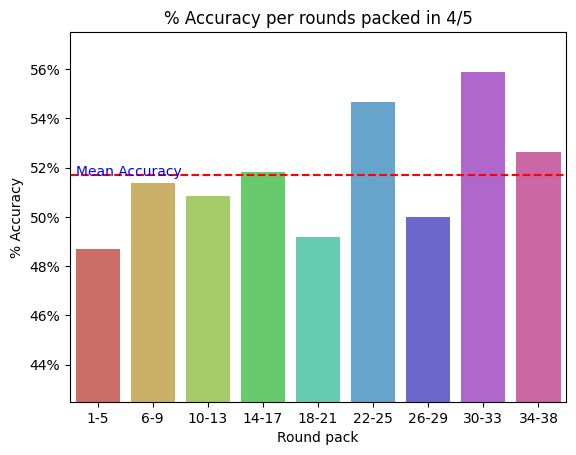

In [55]:
#pack round in 9 groups (1-5, 6-9, 10-13, 14-17, 18-21, 22-25, 26-29, 30-33, 34-38)
dict_round2 = {}

for i in range(0, 9):
    if i == 0 or i == 8:
        dict_round2[i] = dict_round[4*i+1] + dict_round[4*i+2] + dict_round[4*i+3] + dict_round[4*i+4] + dict_round[4*i+5]
        
    else:
        dict_round2[i] = dict_round[4*i+1] + dict_round[4*i+2] + dict_round[4*i+3] + dict_round[4*i+4]

dict_round_errors2 = {}
for i in range (0,9):
    if i == 0 or i == 8:
        dict_round_errors2[i] = dict_round_errors[4*i+1] + dict_round_errors[4*i+2] + dict_round_errors[4*i+3] + dict_round_errors[4*i+4] + dict_round_errors[4*i+5]
        
    else:
        dict_round_errors2[i] = dict_round_errors[4*i+1] + dict_round_errors[4*i+2] + dict_round_errors[4*i+3] + dict_round_errors[4*i+4]
        
dict_round_aux2 = {key: 1- dict_round_errors2[key] / dict_round2[key] for key in dict_round2}
#sort the dict by key from lower to higher
dict_round_aux2 = dict(sorted(dict_round_aux2.items(), key=lambda item: item[0]))

sns.barplot(x=list(dict_round_aux2.keys()), y=list(dict_round_aux2.values()), palette='hls')
plt.title('% Accuracy per rounds packed in 4/5')
plt.ylabel('% Accuracy')
plt.xlabel('Round pack')
plt.ylim(0.425,0.575)
#add as xtiks the 9 round packs (1-5, 6-9, 10-13, 14-17, 18-21, 22-25, 26-29, 30-33, 34-38)
plt.xticks(list(dict_round_aux2.keys()), ['1-5', '6-9', '10-13', '14-17', '18-21', '22-25', '26-29', '30-33', '34-38'])
#multiply by 100 the y axis
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


#plot the mean of the accuracy
plt.axhline(y=np.mean(list(dict_round_aux2.values())), color='r', linestyle='--')
#write mean accuracy value
plt.text(-0.4, np.mean(list(dict_round_aux2.values())), 'Mean Accuracy', color='b', fontsize=10)

#plot a graphic which reflects the 9 accuracy values. The graphic will be a line which connects the 9 points
#plt.plot(list(dict_round_aux2.keys()), list(dict_round_aux2.values()), color='b', linestyle='--')


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

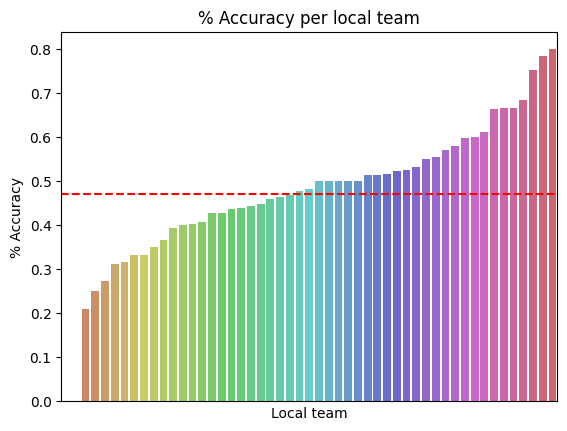

In [11]:
dict_local_team = {}  
ll_equips1 = df_test['localTeam'].unique()
ll_equips2 = df_test['visitorTeam'].unique()
ll_equips1.sort()
ll_equips2.sort()
#ll_equips1 == ll_equips2 #True

#case local 
for i in ll_equips1:
    dict_local_team[i] = df_test[df_test['localTeam'] == i].shape[0]
    
#print(dict_local_team)

dict_local_team_errors = {}
for i in ll_equips1:
    dict_local_team_errors[i] = df_errors[df_errors['localTeam'] == i].shape[0]
#print(dict_local_team_errors)

len(dict_local_team) == len(dict_local_team_errors) #True

dict_local_team_aux = {key: 1- dict_local_team_errors[key] / dict_local_team[key] for key in dict_local_team}
#sort the dict by key from lower to higher values
dict_local_team_aux = dict(sorted(dict_local_team_aux.items(), key=lambda item: item[1]))

sns.barplot(x=list(dict_local_team_aux.keys()), y=list(dict_local_team_aux.values()), palette='hls')
plt.title('% Accuracy per local team')
plt.ylabel('% Accuracy')
plt.xlabel('Local team')
plt.xticks([])
#draw a line which reflects the mean of the accuracy
plt.axhline(y=np.mean(list(dict_local_team_aux.values())), color='r', linestyle='--')
#plot a graphic which reflects the accuracy values. 
#plt.plot(list(dict_local_team_aux.keys()), list(dict_local_team_aux.values()), color='b', linestyle='--')



In [12]:
#Select all the teams with an accuracy higher than 0.5
top_local_teams = {key: dict_local_team_aux[key] for key in dict_local_team_aux if dict_local_team_aux[key] > 0.5} 
#sort the dict by key from higher to lower values
top_local_teams = dict(sorted(top_local_teams.items(), key=lambda item: item[1], reverse=True))

print(top_local_teams)

df_top_local_teams = pd.DataFrame.from_dict(top_local_teams, orient='index', columns=['Accuracy'])
df_top_local_teams.reset_index(inplace=True)
df_top_local_teams.rename(columns={'index': 'Local Team'}, inplace=True)
df_top_local_teams


{'Merida': 0.8, 'Barcelona': 0.7846153846153846, 'Real Madrid': 0.7537313432835822, 'Eibar': 0.6842105263157895, 'Atletico de Madrid': 0.6666666666666667, 'CD Malaga': 0.6666666666666667, 'Atletico de Bilbao': 0.6639344262295082, 'Las Palmas': 0.6129032258064516, 'Hercules': 0.6, 'Villarreal': 0.5977011494252873, 'Valencia': 0.5815602836879432, 'Girona': 0.5714285714285714, 'Salamanca': 0.5555555555555556, 'Zaragoza': 0.5514018691588785, 'Real Burgos': 0.5333333333333333, 'Deportivo': 0.5267857142857143, 'Sevilla': 0.5227272727272727, 'Getafe': 0.5161290322580645, 'Alaves': 0.5151515151515151, 'Celta de Vigo': 0.5148514851485149}


,Local Team,Accuracy
0,Merida,0.800000
1,Barcelona,0.784615
2,Real Madrid,0.753731
3,Eibar,0.684211
4,Atletico de Madrid,0.666667
5,CD Malaga,0.666667
6,Atletico de Bilbao,0.663934
7,Las Palmas,0.612903
8,Hercules,0.600000
9,Villarreal,0.597701


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

Text(-0.5, 0.47171031542876973, 'Total mean Accuracy')

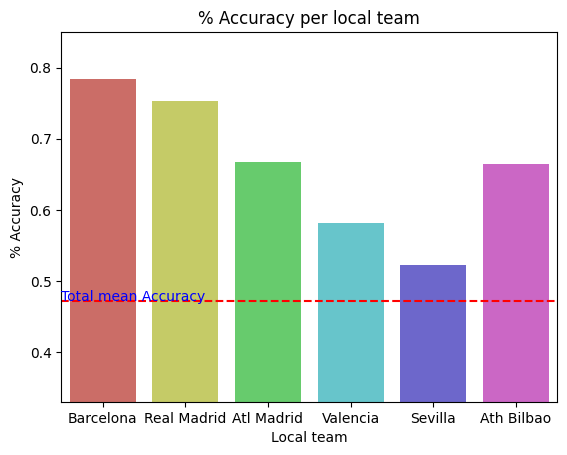

In [13]:
top6_equips = ['Barcelona', 'Real Madrid', 'Atletico de Madrid', 'Valencia', 'Sevilla', 'Atletico de Bilbao'] #according to the EDA computed before.


dict_top6_local_team_aux = {key: dict_local_team_aux[key] for key in top6_equips}

sns.barplot(x=top6_equips, y=[dict_local_team_aux[i] for i in top6_equips], palette='hls')
plt.title('% Accuracy per local team')
plt.ylabel('% Accuracy')
plt.xlabel('Local team')
plt.ylim(0.33,0.85)
#add xticks:
plt.xticks(range(len(top6_equips)), ['Barcelona', 'Real Madrid', 'Atl Madrid', 'Valencia', 'Sevilla', 'Ath Bilbao'])
#draw a line which reflects the mean of the accuracy
plt.axhline(y=np.mean(list(dict_local_team_aux.values())), color='r', linestyle='--')
plt.text(-0.5, np.mean(list(dict_local_team_aux.values())), 'Total mean Accuracy', color='b', fontsize=10)
#plot a graphic which reflects the accuracy values.
#plt.plot(list(dict_local_team_aux.keys()), list(dict_local_team_aux.values()), color='b', linestyle='--')


5
1


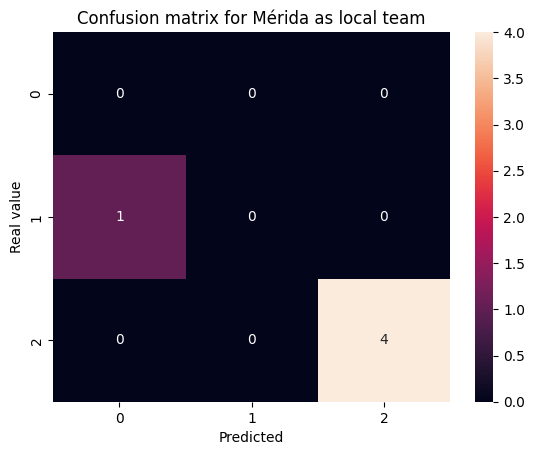

In [14]:
#Merida accuracy is the highest as local team. We will plot the confusion matrix for this team

total_merida_local = df_test[df_test['localTeam'] == 'Merida'].shape[0]
total_errors_merida_local = df_errors[df_errors['localTeam'] == 'Merida'].shape[0]
print(total_merida_local)
print(total_errors_merida_local)

df_merida_local = df_test[df_test['localTeam'] == 'Merida']
df_merida_local.reset_index(inplace=True, drop=True)
df_merida_local

from sklearn.metrics import confusion_matrix
confusion_matrix(df_merida_local['real_value'], df_merida_local['predicted'])
sns.heatmap(confusion_matrix(df_merida_local['real_value'], df_merida_local['predicted']), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Mérida as local team')
plt.show()



In [15]:
df_merida_local.head()

,season,round,localTeam,visitorTeam,T1PliS,T1PviS,T2PliS,T2PviS,total_punts_loc,total_punts_vis,...,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis,predicted,real_value
0,1997-98,7,Merida,Salamanca,0.111111,0.111111,0.111111,0.333333,2.0,4.0,...,2.0,4.0,1,1,11.0,9.0,0,0,2,2
1,1997-98,25,Merida,Atletico de Madrid,0.527778,0.166667,0.692308,0.424242,25.0,41.0,...,5.0,8.0,1,1,14.0,4.0,0,0,2,2
2,1997-98,35,Merida,Real Madrid,0.568627,0.137255,0.725490,0.431373,36.0,59.0,...,2.0,8.0,1,1,14.0,2.0,0,1,0,1
3,1997-98,29,Merida,Deportivo,0.595238,0.142857,0.571429,0.285714,31.0,36.0,...,6.0,7.0,1,1,11.0,9.0,0,1,2,2
4,1997-98,27,Merida,Real Sociedad,0.564103,0.153846,0.761905,0.333333,28.0,44.0,...,5.0,8.0,1,1,13.0,3.0,0,0,2,2


Draw against Madrid predicted as defeat

130
28


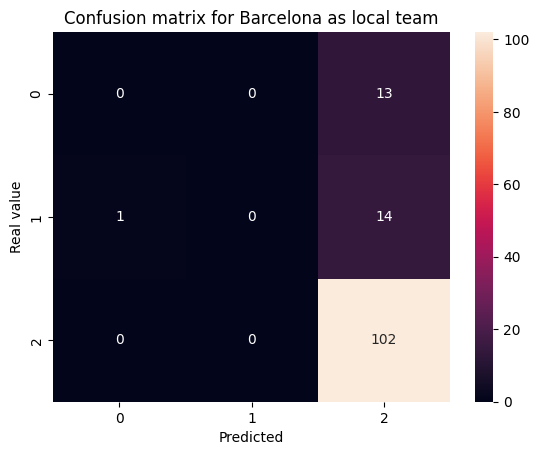

In [16]:
#local Barcelona
total_barcelona_local = df_test[df_test['localTeam'] == 'Barcelona'].shape[0]
total_errors_barcelona_local = df_errors[df_errors['localTeam'] == 'Barcelona'].shape[0]
print(total_barcelona_local)
print(total_errors_barcelona_local)

df_barcelona_local = df_test[df_test['localTeam'] == 'Barcelona']
df_barcelona_local.reset_index(inplace=True, drop=True)
df_barcelona_local

from sklearn.metrics import confusion_matrix
confusion_matrix(df_barcelona_local['real_value'], df_barcelona_local['predicted'])
sns.heatmap(confusion_matrix(df_barcelona_local['real_value'], df_barcelona_local['predicted']), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Barcelona as local team')
plt.show()

In [17]:
df_barcelona_local[(df_barcelona_local['predicted'] == 0) & (df_barcelona_local['real_value'] == 1)]

,season,round,localTeam,visitorTeam,T1PliS,T1PviS,T2PliS,T2PviS,total_punts_loc,total_punts_vis,...,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis,predicted,real_value
74,2017-18,36,Barcelona,Real Madrid,0.921569,0.777778,0.685185,0.666667,89.0,71.0,...,13.0,8.0,1,1,1.0,3.0,1,1,0,1


It predicted in all cases except one, Barça's victory. The only case that was predicted defeat and tied was against Real Madrid, a team that has a lot of weight in the model. As we had seen in the feature importance, the visitorTeam is the most relevant feature for the model.

19
6


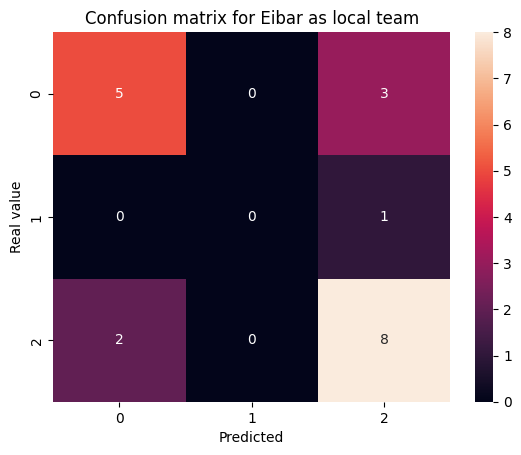

In [18]:
#local Eibar
total_eibar_local = df_test[df_test['localTeam'] == 'Eibar'].shape[0]
total_errors_eibar_local = df_errors[df_errors['localTeam'] == 'Eibar'].shape[0]
print(total_eibar_local)
print(total_errors_eibar_local)

df_eibar_local = df_test[df_test['localTeam'] == 'Eibar']
df_eibar_local.reset_index(inplace=True, drop=True)
df_eibar_local

from sklearn.metrics import confusion_matrix
confusion_matrix(df_eibar_local['real_value'], df_eibar_local['predicted'])
sns.heatmap(confusion_matrix(df_eibar_local['real_value'], df_eibar_local['predicted']), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Eibar as local team')
plt.show()

In [19]:
bottom_local_teams = {key: dict_local_team_aux[key] for key in dict_local_team_aux if dict_local_team_aux[key] < 0.3} 
print(bottom_local_teams)

{'Castellon': 0.0, 'Lleida': 0.0, 'Recreativo de Huelva': 0.21052631578947367, 'Gimnastic de Tarragona': 0.25, 'Elche': 0.2727272727272727}


9
9


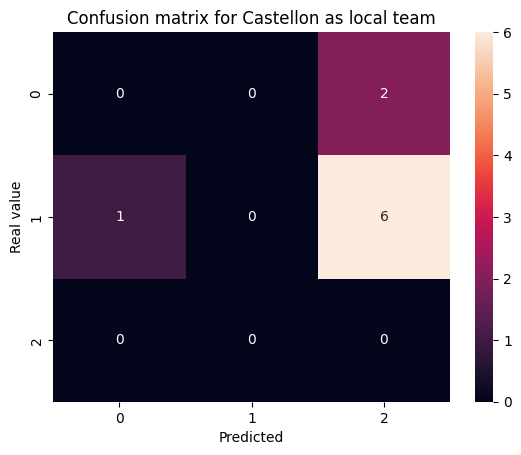

In [20]:
#confusion matrix of Castellon i Lleida:
total_castellon_local = df_test[df_test['localTeam'] == 'Castellon'].shape[0]
total_errors_castellon_local = df_errors[df_errors['localTeam'] == 'Castellon'].shape[0]
print(total_castellon_local)
print(total_errors_castellon_local)

df_castellon_local = df_test[df_test['localTeam'] == 'Castellon']
df_castellon_local.reset_index(inplace=True, drop=True)
df_castellon_local

from sklearn.metrics import confusion_matrix
confusion_matrix(df_castellon_local['real_value'], df_castellon_local['predicted'])
sns.heatmap(confusion_matrix(df_castellon_local['real_value'], df_castellon_local['predicted']), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Castellon as local team')
plt.show()

3
3


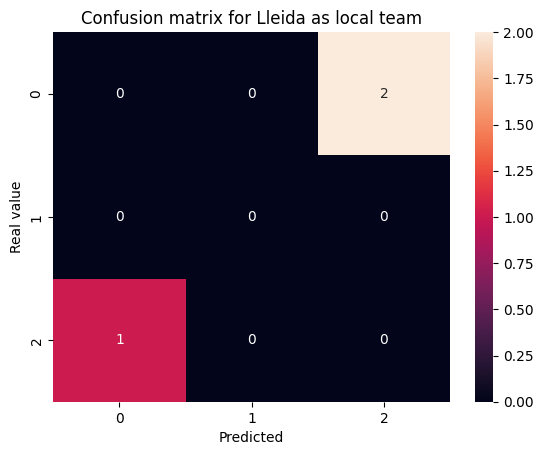

In [21]:
total_lleida_local = df_test[df_test['localTeam'] == 'Lleida'].shape[0]
total_errors_lleida_local = df_errors[df_errors['localTeam'] == 'Lleida'].shape[0]
print(total_lleida_local)
print(total_errors_lleida_local)

df_lleida_local = df_test[df_test['localTeam'] == 'Lleida']
df_lleida_local.reset_index(inplace=True, drop=True)
df_lleida_local

from sklearn.metrics import confusion_matrix
confusion_matrix(df_lleida_local['real_value'], df_lleida_local['predicted'])
sns.heatmap(confusion_matrix(df_lleida_local['real_value'], df_lleida_local['predicted'], labels=[0,1,2]), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Lleida as local team')
plt.show()

c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

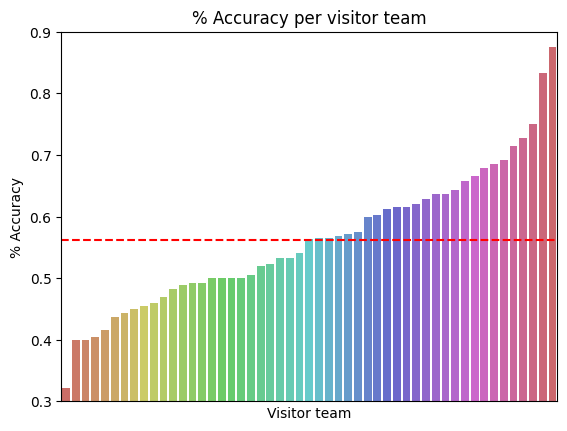

In [22]:
#visitorTeam case:
dict_visitor_team = {}
ll_equips2 = df_test['visitorTeam'].unique()

for i in ll_equips2:
    dict_visitor_team[i] = df_test[df_test['visitorTeam'] == i].shape[0]
    
dict_visitor_team_errors = {}
for i in ll_equips2:
    dict_visitor_team_errors[i] = df_errors[df_errors['visitorTeam'] == i].shape[0]
#print(dict_visitor_team_errors)

len(dict_visitor_team) == len(dict_visitor_team_errors) #True

dict_visitor_team_aux = {key: 1- dict_visitor_team_errors[key] / dict_visitor_team[key] for key in dict_visitor_team}
#sort the dict by key from lower to higher values
dict_visitor_team_aux = dict(sorted(dict_visitor_team_aux.items(), key=lambda item: item[1]))

sns.barplot(x=list(dict_visitor_team_aux.keys()), y=list(dict_visitor_team_aux.values()), palette='hls')
plt.title('% Accuracy per visitor team')
plt.ylabel('% Accuracy')
plt.xlabel('Visitor team')
plt.xticks([])
#start the y axis at 0.2
plt.ylim(0.3, 0.9)
#draw a line which reflects the mean of the accuracy
plt.axhline(y=np.mean(list(dict_visitor_team_aux.values())), color='r', linestyle='--')
#plot a graphic which reflects the accuracy values.
#plt.plot(list(dict_visitor_team_aux.keys()), list(dict_visitor_team_aux.values()), color='b', linestyle='--')


In [23]:
#Select all the local teams with accuracy higher than 0.5
top_visitor_teams = {key: dict_visitor_team_aux[key] for key in dict_visitor_team_aux if dict_visitor_team_aux[key] > 0.5}
#sort the dict by key from higher to lower values
top_visitor_teams = dict(sorted(top_visitor_teams.items(), key=lambda item: item[1], reverse=True))

print(top_visitor_teams)

df_top_visitor_teams = pd.DataFrame.from_dict(top_visitor_teams, orient='index', columns=['Accuracy'])
df_top_visitor_teams.reset_index(inplace=True)
df_top_visitor_teams.rename(columns={'index': 'Visitor Team'}, inplace=True)
df_top_visitor_teams



{'Gimnastic de Tarragona': 0.875, 'Merida': 0.8333333333333334, 'Girona': 0.75, 'Elche': 0.7272727272727273, 'Las Palmas': 0.7142857142857143, 'Albacete': 0.6923076923076923, 'Tenerife': 0.6851851851851851, 'Sporting de Gijon': 0.6794871794871795, 'Xerez': 0.6666666666666667, 'Granada': 0.6571428571428571, 'Real Burgos': 0.6428571428571428, 'Murcia': 0.6363636363636364, 'Castellon': 0.6363636363636364, 'Getafe': 0.6285714285714286, 'Almeria': 0.6206896551724138, 'Logrones': 0.6153846153846154, 'Numancia': 0.6153846153846154, 'Levante': 0.6122448979591837, 'Rayo Vallecano': 0.6031746031746033, 'CD Malaga': 0.6, 'Alaves': 0.5757575757575757, 'Leganes': 0.5714285714285714, 'Osasuna': 0.5688073394495412, 'Sevilla': 0.5655737704918034, 'Oviedo': 0.5652173913043479, 'Valladolid': 0.5632183908045977, 'Barcelona': 0.540983606557377, 'Compostela': 0.5333333333333333, 'Recreativo de Huelva': 0.5333333333333333, 'Malaga': 0.5223880597014925, 'Real Madrid': 0.5192307692307692, 'Celta de Vigo': 0.5

,Visitor Team,Accuracy
0,Gimnastic de Tarragona,0.875000
1,Merida,0.833333
2,Girona,0.750000
3,Elche,0.727273
4,Las Palmas,0.714286
5,Albacete,0.692308
6,Tenerife,0.685185
7,Sporting de Gijon,0.679487
8,Xerez,0.666667
9,Granada,0.657143


8
1


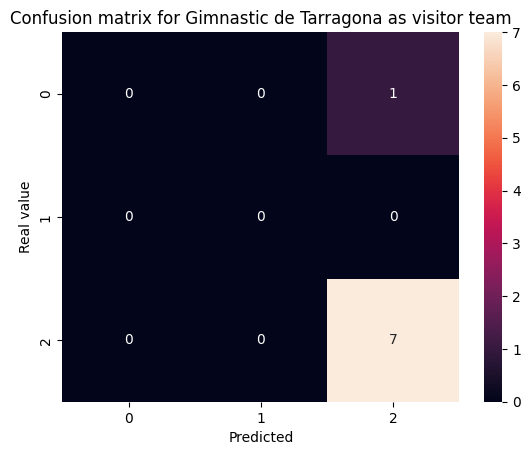

In [24]:
#We analyze Gimnastic de Tarragona as visitor team
total_gimnastic_visitor = df_test[df_test['visitorTeam'] == 'Gimnastic de Tarragona'].shape[0]
total_errors_gimnastic_visitor = df_errors[df_errors['visitorTeam'] == 'Gimnastic de Tarragona'].shape[0]
print(total_gimnastic_visitor)
print(total_errors_gimnastic_visitor)

df_gimnastic_visitor = df_test[df_test['visitorTeam'] == 'Gimnastic de Tarragona']
df_gimnastic_visitor.reset_index(inplace=True, drop=True)
#print(df_gimnastic_visitor)

from sklearn.metrics import confusion_matrix
confusion_matrix(df_gimnastic_visitor['real_value'], df_gimnastic_visitor['predicted'])
sns.heatmap(confusion_matrix(df_gimnastic_visitor['real_value'], df_gimnastic_visitor['predicted'], labels = [0,1,2]), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Gimnastic de Tarragona as visitor team')
plt.show()


6
1


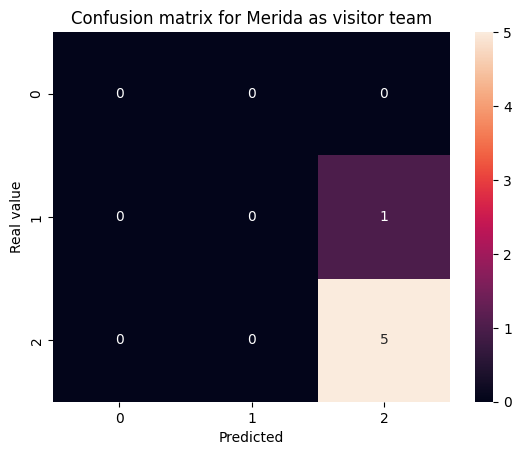

In [25]:
#we analyze merida as a visitorTeam
total_merida_visitor = df_test[df_test['visitorTeam'] == 'Merida'].shape[0]
total_errors_merida_visitor = df_errors[df_errors['visitorTeam'] == 'Merida'].shape[0]
print(total_merida_visitor)
print(total_errors_merida_visitor)

df_merida_visitor = df_test[df_test['visitorTeam'] == 'Merida']
df_merida_visitor.reset_index(inplace=True, drop=True)
df_merida_visitor


from sklearn.metrics import confusion_matrix
confusion_matrix(df_merida_visitor['real_value'], df_merida_visitor['predicted'])
sns.heatmap(confusion_matrix(df_merida_visitor['real_value'], df_merida_visitor['predicted'], labels=[0,1,2]), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Merida as visitor team')
plt.show()


## The model predicts well defeats for bad visitor teams

In [26]:
bottom_visitor_teams = {key: dict_visitor_team_aux[key] for key in dict_visitor_team_aux if dict_visitor_team_aux[key] < 0.42}
print(bottom_visitor_teams)

{'Villarreal': 0.3214285714285714, 'Extremadura': 0.4, 'Salamanca': 0.4, 'Valencia': 0.4042553191489362, 'Atletico de Bilbao': 0.416058394160584}


84


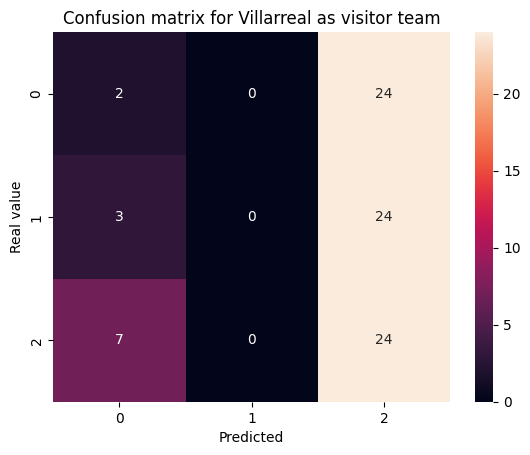

In [27]:
#We analyze villareal as a visitorTeam
total_villareal_visitor = df_test[df_test['visitorTeam'] == 'Villarreal'].shape[0]
total_errors_villareal_visitor = df_errors[df_errors['visitorTeam'] == 'Villarreal'].shape[0]
print(total_villareal_visitor)

df_villareal_visitor = df_test[df_test['visitorTeam'] == 'Villarreal']
df_villareal_visitor.reset_index(inplace=True, drop=True)
df_villareal_visitor

from sklearn.metrics import confusion_matrix
confusion_matrix(df_villareal_visitor['real_value'], df_villareal_visitor['predicted'])
sns.heatmap(confusion_matrix(df_villareal_visitor['real_value'], df_villareal_visitor['predicted'], labels=[0,1,2]), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.title('Confusion matrix for Villarreal as visitor team')
plt.show()




In [28]:
#We create a dictionary with the different results of each team. dict_real_results['team_name']['0'], ['1'], ['2']
dict_real_results= {}

for i in ll_equips1:
    dict_real_results[i] = {}
    dict_real_results[i]['0'] = df_test[(df_test['localTeam'] == i) & (df_test['real_value'] == 0)].shape[0] + df_test[(df_test['visitorTeam'] == i) & (df_test['real_value'] == 2)].shape[0]
    dict_real_results[i]['1'] = df_test[(df_test['localTeam'] == i) & (df_test['real_value'] == 1)].shape[0] + df_test[(df_test['visitorTeam'] == i) & (df_test['real_value'] == 1)].shape[0]
    dict_real_results[i]['2'] = df_test[(df_test['localTeam'] == i) & (df_test['real_value'] == 2)].shape[0] + df_test[(df_test['visitorTeam'] == i) & (df_test['real_value'] == 0)].shape[0]
    
print(dict_real_results)

dict_predicted_results= {}

for i in ll_equips1:
    dict_predicted_results[i] = {}
    dict_predicted_results[i]['0'] = df_test[(df_test['localTeam'] == i) & (df_test['predicted'] == 0)].shape[0] + df_test[(df_test['visitorTeam'] == i) & (df_test['predicted'] == 2)].shape[0]
    dict_predicted_results[i]['1'] = df_test[(df_test['localTeam'] == i) & (df_test['predicted'] == 1)].shape[0] + df_test[(df_test['visitorTeam'] == i) & (df_test['predicted'] == 1)].shape[0]
    dict_predicted_results[i]['2'] = df_test[(df_test['localTeam'] == i) & (df_test['predicted'] == 2)].shape[0] + df_test[(df_test['visitorTeam'] == i) & (df_test['predicted'] == 0)].shape[0]
    
print(dict_predicted_results)


{'Alaves': {'0': 23, '1': 19, '2': 24}, 'Albacete': {'0': 27, '1': 13, '2': 14}, 'Almeria': {'0': 29, '1': 17, '2': 15}, 'Atletico de Bilbao': {'0': 83, '1': 63, '2': 113}, 'Atletico de Madrid': {'0': 77, '1': 72, '2': 118}, 'Barcelona': {'0': 40, '1': 47, '2': 165}, 'Betis': {'0': 76, '1': 62, '2': 64}, 'CD Malaga': {'0': 8, '1': 1, '2': 5}, 'Cadiz': {'0': 22, '1': 21, '2': 18}, 'Castellon': {'0': 9, '1': 10, '2': 1}, 'Celta de Vigo': {'0': 85, '1': 48, '2': 73}, 'Compostela': {'0': 10, '1': 8, '2': 7}, 'Cordoba': {'0': 6, '1': 4, '2': 0}, 'Deportivo': {'0': 77, '1': 64, '2': 68}, 'Eibar': {'0': 18, '1': 8, '2': 15}, 'Elche': {'0': 14, '1': 6, '2': 2}, 'Espanol': {'0': 107, '1': 74, '2': 87}, 'Extremadura': {'0': 3, '1': 4, '2': 2}, 'Getafe': {'0': 61, '1': 33, '2': 38}, 'Gimnastic de Tarragona': {'0': 11, '1': 2, '2': 3}, 'Girona': {'0': 5, '1': 1, '2': 5}, 'Granada': {'0': 37, '1': 13, '2': 14}, 'Hercules': {'0': 5, '1': 1, '2': 3}, 'Las Palmas': {'0': 32, '1': 9, '2': 18}, 'Leganes

In [29]:
#We order dict_real_results by the number of 1's
dict_real_results_aux1 = {key: dict_real_results[key]['1'] for key in dict_real_results}
dict_real_results_aux1 = dict(sorted(dict_real_results_aux1.items(), key=lambda item: item[1], reverse=True))
print(dict_real_results_aux1)

#calculate the % of 1's in each team
dict_real_results_aux1per = {key: dict_real_results_aux1[key] / (dict_real_results_aux1[key] + dict_real_results[key]['0'] + dict_real_results[key]['2']) for key in dict_real_results_aux1}



{'Valencia': 75, 'Espanol': 74, 'Atletico de Madrid': 72, 'Osasuna': 65, 'Deportivo': 64, 'Real Sociedad': 64, 'Sevilla': 64, 'Atletico de Bilbao': 63, 'Betis': 62, 'Zaragoza': 60, 'Mallorca': 56, 'Real Madrid': 53, 'Valladolid': 50, 'Celta de Vigo': 48, 'Barcelona': 47, 'Villarreal': 47, 'Malaga': 43, 'Santander': 35, 'Getafe': 33, 'Rayo Vallecano': 31, 'Oviedo': 30, 'Sporting de Gijon': 29, 'Tenerife': 23, 'Cadiz': 21, 'Alaves': 19, 'Levante': 19, 'Logrones': 18, 'Almeria': 17, 'Numancia': 14, 'Albacete': 13, 'Granada': 13, 'Recreativo de Huelva': 11, 'Castellon': 10, 'Murcia': 10, 'Las Palmas': 9, 'Real Burgos': 9, 'Compostela': 8, 'Eibar': 8, 'Elche': 6, 'Leganes': 5, 'Cordoba': 4, 'Extremadura': 4, 'Salamanca': 4, 'Sabadell': 3, 'Gimnastic de Tarragona': 2, 'Lleida': 2, 'Merida': 2, 'Xerez': 2, 'CD Malaga': 1, 'Girona': 1, 'Hercules': 1}


In [30]:
#Create a dictionary of the accuracy including local and visitor teams
dict_total_team = {}

for i in ll_equips1:
    dict_total_team[i] = {}
    dict_total_team[i] = df_test[df_test['localTeam'] == i].shape[0] + df_test[df_test['visitorTeam'] == i].shape[0]

print(dict_total_team)

dict_total_team_errors = {}

for i in ll_equips1:
    dict_total_team_errors[i] = {}
    dict_total_team_errors[i] = df_errors[df_errors['localTeam'] == i].shape[0] + df_errors[df_errors['visitorTeam'] == i].shape[0]
    
print(dict_total_team_errors)

#calculate accuracy:
dict_total_team_aux = {key: 1- dict_total_team_errors[key] / dict_total_team[key] for key in dict_total_team}
#sort the dict by key from lower to higher values
dict_total_team_aux = dict(sorted(dict_total_team_aux.items(), key=lambda item: item[1]))
print(dict_total_team_aux)

{'Alaves': 66, 'Albacete': 54, 'Almeria': 61, 'Atletico de Bilbao': 259, 'Atletico de Madrid': 267, 'Barcelona': 252, 'Betis': 202, 'CD Malaga': 14, 'Cadiz': 61, 'Castellon': 20, 'Celta de Vigo': 206, 'Compostela': 25, 'Cordoba': 10, 'Deportivo': 209, 'Eibar': 41, 'Elche': 22, 'Espanol': 268, 'Extremadura': 9, 'Getafe': 132, 'Gimnastic de Tarragona': 16, 'Girona': 11, 'Granada': 64, 'Hercules': 9, 'Las Palmas': 59, 'Leganes': 17, 'Levante': 87, 'Lleida': 9, 'Logrones': 76, 'Malaga': 150, 'Mallorca': 188, 'Merida': 11, 'Murcia': 41, 'Numancia': 47, 'Osasuna': 217, 'Oviedo': 96, 'Rayo Vallecano': 135, 'Real Burgos': 29, 'Real Madrid': 290, 'Real Sociedad': 245, 'Recreativo de Huelva': 34, 'Sabadell': 10, 'Salamanca': 14, 'Santander': 145, 'Sevilla': 254, 'Sporting de Gijon': 151, 'Tenerife': 96, 'Valencia': 282, 'Valladolid': 162, 'Villarreal': 171, 'Xerez': 9, 'Zaragoza': 207}
{'Alaves': 30, 'Albacete': 22, 'Almeria': 29, 'Atletico de Bilbao': 121, 'Atletico de Madrid': 122, 'Barcelona'

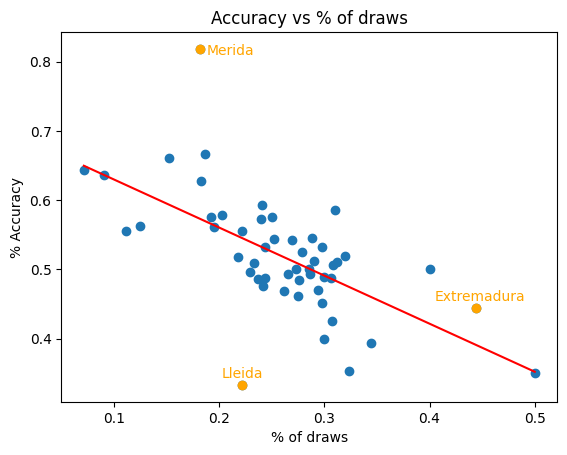

In [40]:
#We create a scatter plot relating dict_real_results_aux1per with dict_total_team_aux (percentage of draws vs accuracy)

dict_real_results_aux1per = dict(sorted(dict_real_results_aux1per.items(), key=lambda item: item[0]))
dict_total_team_aux = dict(sorted(dict_total_team_aux.items(), key=lambda item: item[0]))

plt.scatter(list(dict_real_results_aux1per.values()), list(dict_total_team_aux.values()))
plt.title('Accuracy vs % of draws')
plt.xlabel('% of draws')
plt.ylabel('% Accuracy')

#plot a linear regression for the scatter plot using plt
plt.plot(np.unique(list(dict_real_results_aux1per.values())), np.poly1d(np.polyfit(list(dict_real_results_aux1per.values()), list(dict_total_team_aux.values()), 1))(np.unique(list(dict_real_results_aux1per.values()))), color='red')

#change the color of some points to orange. Change 'Merida' and 'Extremadura' and 'Lleida'. We also add the name of the team to the point
plt.scatter(dict_real_results_aux1per['Merida'], dict_total_team_aux['Merida'], color='orange')
plt.text(dict_real_results_aux1per['Merida']+0.006, dict_total_team_aux['Merida']-0.008, 'Merida',color='orange',  fontsize=10)
plt.scatter(dict_real_results_aux1per['Extremadura'], dict_total_team_aux['Extremadura'], color='orange')
plt.text(dict_real_results_aux1per['Extremadura']-0.04, dict_total_team_aux['Extremadura']+0.01, 'Extremadura', color='orange', fontsize=10)
plt.scatter(dict_real_results_aux1per['Lleida'], dict_total_team_aux['Lleida'], color='orange')
plt.text(dict_real_results_aux1per['Lleida'] -0.02, dict_total_team_aux['Lleida']+0.01, 'Lleida', color='orange', fontsize=10)

# #we change the color of those points which df_test['localTeam'] està en més de 10 temporades
# #per cada equip, comptem en quantes temporades està. Si està en més de 10, el posem en vermell
# for i in ll_equips1:
#     if df_test[df_test['localTeam'] == i]['season'].nunique() > 15:
#         plt.scatter(dict_real_results_aux1per[i], dict_total_team_aux[i], color='red')
#         #We can compute a regresion line for those teams who have played more than 10 seasons

        
plt.show()


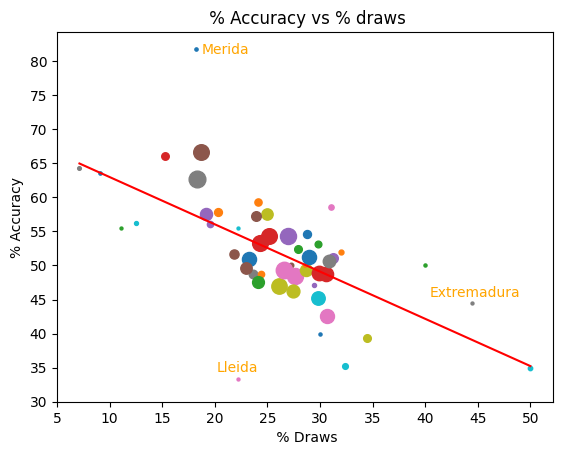

In [54]:
#We create a scatter plot relating dict_real_results_aux1per with dict_total_team_aux (percentage of draws vs accuracy)
dict_real_results_aux1per = dict(sorted(dict_real_results_aux1per.items(), key=lambda item: item[0]))
dict_total_team_aux = dict(sorted(dict_total_team_aux.items(), key=lambda item: item[0]))

#plt.scatter(list(dict_real_results_aux1per.values()), list(dict_total_team_aux.values()))
plt.title(' % Accuracy vs % draws')
plt.xlabel(' % Draws')
plt.ylabel('% Accuracy')

#plot a linear regression for the scatter plot using plt
plt.plot(np.unique(list(dict_real_results_aux1per.values())), np.poly1d(np.polyfit(list(dict_real_results_aux1per.values()), list(dict_total_team_aux.values()), 1))(np.unique(list(dict_real_results_aux1per.values()))), color='red')

#make bigger points to the teams with more seasons and smaller points to the teams with less seasons. Make a different size for each season
for i in ll_equips1:
    plt.scatter(dict_real_results_aux1per[i], dict_total_team_aux[i], s=dict_total_team[i]*0.5)
 

#change the color of some points to orange. Change 'Merida' and 'Extremadura' and 'Lleida'. We also add the name of the team to the point
#plt.scatter(dict_real_results_aux1per['Merida'], dict_total_team_aux['Merida'], color='orange')
plt.text(dict_real_results_aux1per['Merida']+0.006, dict_total_team_aux['Merida']-0.008, 'Merida',color='orange',  fontsize=10)
#plt.scatter(dict_real_results_aux1per['Extremadura'], dict_total_team_aux['Extremadura'], color='orange')
plt.text(dict_real_results_aux1per['Extremadura']-0.04, dict_total_team_aux['Extremadura']+0.01, 'Extremadura', color='orange', fontsize=10)
#plt.scatter(dict_real_results_aux1per['Lleida'], dict_total_team_aux['Lleida'], color='orange')
plt.text(dict_real_results_aux1per['Lleida'] -0.02, dict_total_team_aux['Lleida']+0.01, 'Lleida', color='orange', fontsize=10)
#multiply xlabel by 100
plt.xticks(np.arange(0.05, 0.55, 0.05), np.arange(5, 55, 5))
#multiply ylabel by 100
plt.yticks(np.arange(0.3, 0.85, 0.05), np.arange(30, 85, 5))
plt.show()

In [33]:
#We want to save the variables with a % of draws higher than 0.38 
{key: dict_real_results_aux1per[key] for key in dict_real_results_aux1per if dict_real_results_aux1per[key] > 0.38}

{'Castellon': 0.5, 'Cordoba': 0.4, 'Extremadura': 0.4444444444444444}

This 3 teams can be considered outliers, as they have been few seasons in Laliga and we have little data. ('Cordoba' and 'Extremadura' have only played 1 season in the first division)

In [34]:
{key : dict_total_team_aux[key] for key in dict_total_team_aux if dict_total_team_aux[key] > 0.7}

{'Merida': 0.8181818181818181}

Merida is another outlier. There are only 11 games where they played in the data.

##### As it is observable from the plot, the model does not predict well those games which result in a draw.  The teams which have more draws, are more unpredictable.

In [35]:
{key : dict_total_team_aux[key] for key in dict_total_team_aux if dict_total_team_aux[key] < 0.4}

{'Cadiz': 0.3770491803278688,
 'Castellon': 0.35,
 'Lleida': 0.33333333333333337,
 'Recreativo de Huelva': 0.38235294117647056}